<a href="https://colab.research.google.com/github/will0999/text-files-manipulation/blob/main/Projeto_Simula%C3%A7%C3%A3o_de_Download_Programa%C3%A7%C3%A3o_e_Estrutura_de_Dados_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto da Disciplina - Programação e Estrutura de Dados (CSTRC 2021.1)

## Especificação: Gerenciador de download/Banda de Internet 

### 1. Contextualização

A empresa RCIF está trabalhando no lançamento de um novo roteador ao mercado consumidor: O RC2021. O projeto do hardware do roteador já está pronto e sua equipe ficou responsável por implementar o firmware que vai gerenciar o RC2021, no que diz respeito ao módulo de gerenciamento de banda de internet.

O RC2021 é alimentado por uma banda de internet provida por uma empresa provedora externa, que pode variar de 5Mbs, 10Mbps, 15Mbps, 30Mbps, 50Mbps ou mais (link de internet). Neste projeto, as máquinas conectadas à rede vão originar requisições para fazer apenas download. 

Dentro de uma rede domiciliar, a banda de internet é compartilhada por todos os computadores conectados a ela. Neste projeto, supondo apenas como exemplo um link de internet de 10Mbps, vamos simular a divisão de banda considerando o seguinte cenário.
* Com apenas 1 computar requisitando o download de um recurso, ela usará toda a banda de internet. Ou seja, os 10 Mbps estarão à sua disposição;
* Com 2 máquinas, o link de internet será dividido, ficando 50% da banda para cada computador. Portanto máquina1 = 5Mbps e máquina2 = 5Mbps
* Com 3 máquinas, o link de internet será dividido por 3, ficando 33,3% para cada máquina, ou seja, 3,3Mbps pra cada uma. E assim por diante.

O roteador RC2021 permite definir quais máquinas terão uma maior largura de banda na hora da divisão. O acréscimo da largura de banda é definida em porcentagem, sendo esta no máximo de 50%.


#### Exemplo

Para fins de exemplificação, consideremos que as máquinas prioritárias (que detém maior banda) terão 10% a mais de banda no momento da divisão.  Vamos considerar o seguinte cenário, onde o ícone ⭐️ sinaliza um IP prioritário:

Computadores:

* (A) 192.168.30.100 ⭐️
* (B) 192.168.30.101
* (C) 192.168.30.102
* (D) 192.168.30.103
* (E) 192.168.30.104
* (F) 192.168.30.105 ⭐️

Cada computador pode requisitar `n` recursos. A solicitação de um recurso por um computador é enviada ao roteador com o seguinte cabeçalho: `id`, `ip`, `arquivo solicitado` e `tamanho do arquivo`, sempre em `KB` (Kilobytes).  Por exemplo, a tupla: 

* (B) `[IFPB01; 192.168.30.101; doc1.doc; 1500]`

indica que o computador IFPB01, cujo endereço IP é o 192.168.30.101, está solicitando o documento doc1.doc, de tamanho 1500 Kb. Como é o único recurso que está usando o link de internet, ele usa os 10 Mbps disponível.

Agora vamos considerar o cenário com 4 computadores (Figura 1).

<div align="center">

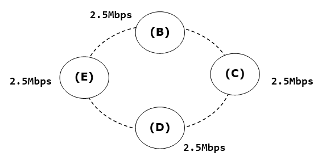 \

*Figura 1*
</div>


Observe que cada máquina vai ficar com 2,5 Mbps de internet. Porém, se trocarmos o computador (B) pelo computador (A), que é um computador com IP prioritário (10% a mais de banda), teremos a seguinte distribuição:


<div align="center">

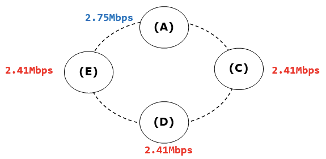 \
*Figura 2*
</div>

Caso consideremos a troca do computador (D) pelo computador (F), teremos a seguinte distribuição:

<div align="center">

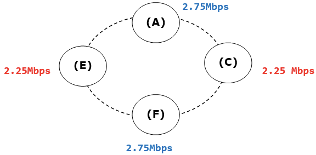 \
*Figura 3*
</div>

💡 *IMPORTANTE:* um mesmo computador pode requisitar mais de um recurso. Por exemplo, no lugar do computador (F) poderia ter outro (A), o que implicaria em um recálculo da banda dividida. Obviamente, quando um recurso é transferido para um computador (finalizado), este sai do ciclo de processamento e a banda é, então, redistribuída.

####Tempo de processamento 

Considere que o processador do roteador seja capaz de tratar múltiplas requisições de download simultaneamente, dentro de um espaço de tempo que chamaremos de **ciclo**. Porém, a quantidade de Kilobytes "baixados" por unidade de execução vai depender da banda de internet atribuída a cada máquina/recurso.

Um ciclo de processamento deve ser entendido como uma execução parcial do download de cada requisição inserida na simulação. Por  exemplo, tomando como exemplo a Figura 4, um ciclo de processamento começa com a descarga em Kb/s do recurso solicitado por (A), depois (C), depois (F), depois (B) e, finalmente (E), completando o ciclo.

Se o recurso solicitado por (A) tem tamanho de 3 MBytes (3.000 KB), e a banda de internet é de 2.20 Mbps, significa que, por segundo, são descarregados 275 KB por segundo. Logo, o download de (A) será realizado em 10,9 ciclos, ou seja, 11 ciclos. Observe que o gerenciador de banda e download deve tomar conhecimento do que já foi baixado em ciclos anteriores, para não perder o controle dos dados nos próximos ciclos.

### 2. Requisitos Funcionais

Neste projeto, a equipe deverá implementar a simulação do funcionamento descrito na Seção 1 deste documento. A interface com o usuário deve fornecer um menu com as seguintes opções:

- REQ 1. Importar computadores: importar informações sobre computadores que podem solicitar recursos para download a partir de um arquivo CSV previamente fornecido. 
- REQ 2. Importar recursos: importar recursos que serão utilizados na simulação a partir de um arquivo CSV previamente fornecido
- REQ 3. Inserir jobs para processamento: Adiciona o par computador/recurso que será processado pelo gerenciador de download/banda. A inserção de um par computador/recurso não implica na imediata execução. A decisão sobre como o par computador/recurso será inserido (se cadastrado separadamente ou adicionado no momento de inserção da lista de execução) vai depender da coerência em relação à solução adotada pela equipe e se processamentos desnecessários e/ou redundantes não estão sendo efetuados.
- REQ 4. Listar jobs da simulação: Exibe de forma organizada na tela a relação de jobs adicionados para a simulação.
- REQ 5. Remover um job da lista de execução: remove um computador/recurso da lista de execução. Obviamente, a distribuição de banda deverá ser recalculada para todos os nós. Considere que não será possível remover um job depois que a simulação for iniciada.
- REQ 6. Iniciar a simulação. Inicia a simulação conforme funcionamento descrito na Seção 1. Para facilitar o acompanhamento, apresente as informações da parcela de download de cada job referente ao ciclo de acordo com a banda atribuída. 

#### Funcionamento da simulação 

É importante que sejam apresentadas informações na tela referente à execução de cada ciclo. Permita que também seja possível sair da simulação (sem perder o que já foi processado) para inserir novos jobs. Ao retornar a simulação, o gerenciador mantém o que já foi feito e processa o novo job a partir do ciclo corrente, inclusive considerando o recálculo de banda de internet.

À medida que os jobs forem finalizados, retire do ciclo (fisicamente ou não) e armazene em uma estrutura de dados que permita acessar a ordem dos jobs que foram finalizados. Para cada job finalizado, é necessário informar o computador requisitante, o tamanho do arquivo, quantos ciclos foram necessários para efetuar o download e a banda de internet observada no último ciclo.

À medida que cada job for sendo finalizado, recalcular a banda para os jobs remanescentes e considerar os novos valores de banda para continuidade da simulação. Na simulação, tal funcionamento deve ser claro para acompanhamento do atendimento desta funcionalidade.

Outras opções de menu podem ser acrescentadas, conforme necessidade do projeto definido pela equipe. Da mesma forma, pode haver a junção entre opções, pois vai depender da solução seguida pela equipe. A interface de simulação do funcionamento do gerenciador de downloads deve ser pensada com cuidado para que, durante a apresentação do projeto, seja possível observar que os requisitos estão sendo atendidos.

Outros elementos que devem ser atendidos como requisitos funcionais são:
* Implementação do projeto utilizando o Paradigma Orientado a Objetos;
* A banda de internet é configurada na unidade Mbps. O tamanho do arquivo de download pode ser informado em qualquer unidade de medida (KB, MB, GB, etc.), porém, a transferência durante a simulação é feita em KB/s.
* O sistema deve permitir que o usuário possa configurar a banda de internet que será considerada para a simulação;
* Não permitir que um IP inválido seja cadastrado;
* Apresentar mensagens de diálogo entre o usuário e sua interação com o sistema. Por exemplo, caso o usuário tente inserir um IP inválido, uma mensagem deve ser exibida ao usuário para que ele tenha conhecimento;
* Realizar validações de dados sempre que forem apropriadas. Por exemplo, se o limite máximo de banda é 50.0, o sistema não deve permitir que seja aceito um valor maior.



### 3. Requisitos não-funcionais

Os seguintes requisitos não funcionais deverão pautar todo o projeto e desenvolvimento dos softwares:

* Garantir o encapsulamento na implementação das classes
* **A simulação dos ciclos de execução deve apresentar ao usuário as informações necessárias para acompanhamento do cumprimento dos requisitos**;
* Minimizar acoplamento  entre módulos;
* Documentação do código no formato DOC STRINGS;
* Os identificadores de variáveis devem estar bem significativos (evite nomes como x1, a2, etc. prefira buffer, prioridade, etc);
* Interface simples, porém, de fácil utilização.
* Modularização.


### 4. Etapas

As datas de apresentação das funcionalidades requeridas em cada checkpoint estão definidas no calendário de aulas da disciplina. Cada etapa é dependente do que foi implementado na etapa anterior. Logo, o que não foi feito/ajustado na Etapa 1, vai influenciar na redução da nota na etapa seguinte. 


#### Checkpoint 1: 25 % pontos

(a) Fazer carregamento dos dados que serão utilizados na simulação (computadores, recursos) a partir de arquivos CSV e apresentar o código que permite visualizar os dados dos computadores e recursos digitais previamente carregados

(b) Apresentar e justificar as estruturas de dados, que serão aplicadas ao projeto (para armazenar por exemplo os computadores, recursos e . A codificação das estruturas deve, preferencialmente, estender ou modificar os códigos apresentados/fornecidos no nosso ambiente de sala de aula.

#### Checkpoint 2: 25 % pontos

(a) Cadastrar/remover/listar jobs. Os “jobs” são as unidades de processamento que vão fazer parte da simulação. No mínimo, o job deve indicar qual computador requisitará o download de um recurso específico

(b) Povoar estrutura de dados adequada com os jobs cadastrados. O povoamento deve ser feito diretamente no programa, a partir dos computadores/recursos disponíveis.

#### Checkpoint 3 (Projeto Completo): 50%

(a)	Executar a simulação do processamento dos jobs (aguardar confirmação)

(b)	Apresentar informações antes, durante e depois da simulação que colaborem para observar o correto funcionamento da simulação

(c)	Apresentar a sequência dos jobs finalizados (mostrar, como informação, pelo menos o ip ou id do computador, o recurso que foi baixado e o número de ciclos que foi necessário para concluir a tarefa)


### 5. Prazos e outras informações

* Equipe de, no máximo, 04 (quatro) alunos.
* O projeto corresponde à nota da 4ª Avaliação;
* Os projetos serão defendidos em data definida no calendário da disciplina. Os membros da equipe serão sabatinados sobre o código. A nota de cada aluno pode ser diferenciada, dependendo do grau de participação/conhecimento de cada aluno na elaboração do projeto.
* O código deve ser implementado neste mesmo notebook (veja seção 5) e entregues a cada prazo de entrega parcial. Os códigos enviados com atraso terão uma redução automática de 20% do total de pontos equivalente à etapa do projeto.


#### Observações
* Discuta com o professor as idéias levantadas pela equipe para que ele possa guiá-los corretamente durante a codificação do projeto. Discutam, desenvolvam a estratégia de programação antes de ir para o computador. Isso ajuda a prevenir riscos futuros. 
* IMPORTANTE: Caso seja detectada cópia dos trabalhos, todas as cópias serão anuladas, independente de quem fez e quem copiou. 
* Lembrem-se que uma má estrutura do programa, logo no início, prejudicará potencialmente o desenvolvimento do projeto. Evoluam o código gradativamente.


## Implementação

### Carregamento dos dados iniciais

Para facilitar o trabalho, estamos fornecendo arquivos CSV que irão popular dois objetos: Computer (Computador) e Resource (Recurso Digital). Os dados iniciais são lidos a partir de arquivos CSV. Para isto, basta executar as próximas celulas que você estará apto a acessar a lista de computadores e recursos.

In [ ]:
! git clone https://github.com/ifpb/ped-redes-projeto

Cloning into 'ped-redes-projeto'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 13 (delta 3), reused 13 (delta 3), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [ ]:
%cd ped-redes-projeto/

/content/ped-redes-projeto/ped-redes-projeto/ped-redes-projeto/ped-redes-projeto/ped-redes-projeto/ped-redes-projeto/ped-redes-projeto


### Entrega Checkpoint 1: 25 % pontos

(a) Fazer carregamento dos dados que serão utilizados na simulação (computadores, recursos) a partir de arquivos CSV e apresentar o código que permite visualizar os dados dos computadores e recursos digitais previamente carregados

In [ ]:
from seed import loadComputers, loadResources

if __name__ == '__main__':
    computadores = loadComputers()
    print(computadores)
    recursos = loadResources()
    print(recursos)

[id=ifpb-pc-01 ip=192.168.30.100 increaseBand=S, id=ifpb-pc-02 ip=192.168.30.101 increaseBand=N, id=ifpb-pc-03 ip=192.168.30.102 increaseBand=N, id=ifpb-pc-04 ip=192.168.30.103 increaseBand=N, id=ifpb-pc-05 ip=192.168.30.104 increaseBand=N, id=ifpb-pc-06 ip=192.168.30.105 increaseBand=S]
[id=1 name=videoaula_arvores_binarias.mp4 size=300 unit=MB, id=2 name=TCC.doc size=3 unit=MB, id=3 name=ifpb - laboratorio.jpg size=1500 unit=KB, id=4 name=setup.exe size=5,5 unit=MB, id=5 name=anotacoes.txt size=1 unit=KB]


(b) Apresentar e justificar as estruturas de dados, que serão aplicadas ao projeto. A codificação das estruturas deve, preferencialmente, estender ou modificar os códigos apresentados/fornecidos no nosso ambiente de sala de aula.

[resposta aqui] - crie novas células caso julgue necessário

JUSTIFICATIVA DA UTILIZAÇÃO DAS ESTRUTURAS:

Para armazenar os computadores E recursos, nosso grupo decidiu escolher a estrutura Lista encadeada/duplamente encadeada, por possuir uma fácil implementação de busca por seus elementos, e por ser uma estrutura mais enxuta de se implementar e que irá suprir as necessidades pedidas no enunciado.

Para armazenar os Jobs, decidimos utilizar a estrutura LISTA CIRCULAR, por a mesma se encaixar perfeitamente no conceito da simulação por ciclos apresentado no exemplo. Nesta estrutura, diferente das outras, o seu último nó aponta para o seu primeiro, criando um circulo, ou seja, ela não tem início nem fim. Essa característica facilitará na implementação do código da simulação.

EQUIPE:

RAIONI DANTAS

WILLIAN LUSTOSA

EDIMILSON JÚNIOR

VICTOR DE OLIVEIRA

In [ ]:
#Apresente aqui as estruturas de dados

In [ ]:
#Codifique as estruturas de dados que irão armazenar os objetos do projeto (computadores, recursos, jobs)
# PARTICIPAÇÃO DO PROJETO
# EDMILSON - IMPLEMENTAÇÃO DA CLASSE JOBS, SIMULAÇÃO,IMPLEMENTAÇÃO DOS JOBS NA LISTA CIRCULAR E CONTADOR DE CICLOS 
# RAIONI - MODIFICAÇÃO E IMPLEMENTAÇÃO DA CLASSE 'NO' E DE SEUS ATRIBUTOS PARA AS DUAS ESTRUTURAS ESCOLHIDAS, MAPEAMENTO DE VARIAVÉIS, OBJETOS, SIMULAÇÃO FINAL E DIVISOR DE BANDA
# WILLIAN - IMPLEMENTAÇÃO DA SUPERCLASSE DE EXCEÇÃO, TRATAMENTO DAS EXCEÇÕES NAS ESTRUTURAS ESCOLHIDAS, IMPLEMENTAÇÃO DE LISTA CIRCULAR E LISTA DUPLAMENTE ENCADEADA
# VICTOR - MODULARIZAÇÃO DE CÓDIGO, IMPLEMENTAÇÃO DOS COMPUTADORES E RECURSOS NA ESTRUTURA LISTA ENCADEADA E IMPLEMENTAÇÃO DA INTERFACE

In [ ]:
from time import sleep

In [ ]:
#Implementação da super classe de Excessões#
class SuperExceptionsClass(Exception):
    def __init__(self, message):
        super().__init__(message)

In [ ]:
#Classe "No" que engloba os atributos de todas as estruturas de dados escolhidas#
class No:
    def __init__(self, carga: object = None, ant: 'No' = None,prox: 'No' = None):
        self.carga = carga
        self.prox = self#prox
        self.ant = ant

    def __str__(self):
        return str(self.carga)

In [ ]:
#Implementação da classe LISTA DUPLAMENTE ENCADEADA pra o carregamento dos computadores e recursos#
       
class ListaDuplamenteEncadeada:
    def __init__(self):
        self.cabeca = None
        self.cauda = None  

    def imprimir_lista(self):
        if self.cabeca is None:
            print("Lista vazia")
            return

        atual: 'No' = self.cabeca
        while atual is not None:
            print(atual)
            atual = atual.prox

    def inserir_no_inicio(self, valor: object):
        novo: 'No' = No(valor)
        if self.cabeca is None:
            self.cabeca = self.cauda = novo
        else:        
            novo.prox = self.cabeca
            self.cabeca = novo
            novo.prox.ant = novo

    def inserir_no_final(self, valor):
        novo: 'No' = No(valor)
        if self.cabeca is None:
            self.cabeca = self.cauda = novo
        else:
          novo.ant = self.cauda # O anterior do nó novo será a cauda atual
          novo.ant.prox = novo # O próximo do elemento anterior será o novo elemento a ser inserido
          self.cauda = novo # a cauda passa a ser o elemento novo a ser inserido

    def remover_do_inicio(self):
        if self.cabeca is None:
            print("Lista vazia")
            return
        
        if self.cabeca == self.cauda:
            self.cabeca = self.cauda = None
        else:
            self.cabeca = self.cabeca.prox 
            self.cabeca.ant = None # O anterior da nova cabeça agora passa a apontar para None

    def remover_do_final(self):
        if self.cabeca is None:
            print("Lista vazia")
            return
        
        if self.cabeca == self.cauda:
            self.cabeca = self.cauda = None
        else:
            # Note que agora não é mais necessário percorrer a lista até o final, basta começar navegando pela cauda
            self.cauda = self.cauda.ant # Faz a cauda apontar agora para o penúltimo elemento da lista
            self.cauda.prox = None # o próximo da nova cauda agora passa a pontar para None

    def imprimir_invertido(self):
        atual: 'No' = self.cauda
        while atual is not None:
            print(atual.carga)
            atual = atual.ant

    def remover_de_posicao(self, pos):
      if pos == 0:
        self.remover_do_inicio()
        return

      atual: 'No' = self.cabeca
      contador: int = 0
      while atual is not None:
        if pos == contador:
          atual.ant.prox = atual.prox
          if atual.prox is not None:
            atual.prox.ant = atual.ant
          else:
            self.cauda = atual
        atual = atual.prox
        contador += 1

    def __getitem__(self, indice):
            if isinstance(indice, slice):
                fatia = ListaDuplamenteEncadeada()
                atual: 'No' = self.cabeca
                
                inicio = indice.start if indice.start else 0
                final = indice.stop if indice.stop else self.total

                for i in range(final):
                    if i >= inicio:
                        fatia.append(atual.carga)
                    atual = atual.prox
                return fatia
            else:
                atual: 'No' = self.cabeca
                for i in range(indice): 
                    atual = atual.prox
                return atual.carga

In [ ]:
class ListaCircular:
    def __init__(self):
        self.cabeca = None
        self.count = 0
     
    def __repr__(self):
        string = ""
        cont = 0
        if(self.cabeca == None):
            #Lançando exeção caso o usúario tente listar os jobs existentes e não existir jobs
            raise SuperExceptionsClass("Não há jobs.")
          
        string += f"JOB {cont+1}: {self.cabeca.carga}\n"
        cont += 1      
        temp = self.cabeca.prox
        while(temp != self.cabeca):
            string += f"JOB {cont+1}: {temp.carga}\n"
            temp = temp.prox
            cont += 1
        return string
     
    def append(self, carga):
        self.insert(carga, self.count)
        return
     
    def insert(self, carga, index):
        if (index > self.count) | (index < 0):
            #retornando exceção caso o usuário tente adicionar uma carga em um indíce que não tenha na lista.
            raise SuperExceptionsClass(f"Não foi possível inserir o indíce, pois o indice '{index}',não existe na lista ou é menor que 0\nTamanho da lista: {self.count}")   
             
        if self.cabeca == None:
            self.cabeca = No(carga)
            self.count += 1
            return
         
        temp = self.cabeca
        for _ in range(self.count - 1 if index - 1 == -1 else index - 1):
            temp = temp.prox
             
        aftertemp = temp.prox 
        temp.prox = No(carga)
        temp.prox.prox = aftertemp
        if(index == 0):
            self.cabeca = temp.prox
        self.count += 1
        return
     
    def remove(self, index):
        if (index >= self.count) | (index < 0):
            #retornando exceção caso o usuário tente remover um indíce que não tenha na lista.
            raise SuperExceptionsClass(f"Não foi possível remover o indíce, pois o indice '{index}',não existe na lista ou é menor que 0\nTamanho da lista: {self.count}")
         
        if self.count == 1:
            self.cabeca = None
            self.count = 0
            return
         
        before = self.cabeca
        for _ in range(self.count - 1 if index - 1 == -1 else index - 1):
            before = before.prox
        after = before.prox.prox
         
        before.prox = after
        if(index == 0):
            self.cabeca = after
        self.count -= 1
        return
     
    def index(self, carga):
        temp = self.cabeca
        for i in range(self.count):
            if(temp.carga == carga):
                return i
            temp = temp.prox
        return None

    def __len__(self):
        if self.cabeca == None:
            raise SuperExceptionsClass('Lista vazia')

        atual = self.cabeca.prox
        c = 1
        while atual is not self.cabeca:
            c+=1
            atual = atual.prox
        return c

    #Método para conseguir dar print na lista por índice, ex: print(lista[0])
    def __getitem__(self, indice):
            if isinstance(indice, slice):
                fatia = ListaCircular()
                atual: 'No' = self.cabeca
                
                inicio = indice.start if indice.start else 0
                final = indice.stop if indice.stop else self.total

                for i in range(final):
                    if i >= inicio:
                        fatia.append(atual.carga)
                    atual = atual.prox
                return fatia
            else:
                atual: 'No' = self.cabeca
                for i in range(indice): 
                    atual = atual.prox
                #return f"id: {atual.carga.id}\nip: {atual.carga.ip}\narquivo solicitado: {atual.carga.arquivo}\ntamanho do arquivo: {atual.carga.tamanho}{atual.carga.unidade}"
                return atual.carga


    def mostrar(self, indice):
            if isinstance(indice, slice):
                fatia = ListaCircular()
                atual: 'No' = self.cabeca
                
                inicio = indice.start if indice.start else 0
                final = indice.stop if indice.stop else self.total

                for i in range(final):
                    if i >= inicio:
                        fatia.append(atual.carga)
                    atual = atual.prox
                return fatia
            else:
                atual: 'No' = self.cabeca
                for i in range(indice): 
                    atual = atual.prox
                return f"id: {atual.carga.id}\nip: {atual.carga.ip}\narquivo solicitado: {atual.carga.arquivo}\ntamanho do arquivo: {atual.carga.tamanho}{atual.carga.unidade}"

In [ ]:
#Divisão de banda

def divisaoBanda(jobs, banda):
  adicional_banda = 1.1                 #Banda adicional de 10% para os Computadores prioritários
  banda_convertida = banda * 125        #Convertendo banda de Mbps para KBps
  
  normal = 0                            # Contador de pcs normais
  prioritario = 0                       #Contador de pcs prioritarios
  for i in range(len(jobs)):            #Percorrendo a lista de jobs
    if jobs[i].increaseBand == "N":     #Se o PC não for prioritario adiciona +1 para o contador de pcs normais
      normal += 1
    else:
      prioritario += 1                  #else adiciona +1 para o contador de pcs prioritarios

  divisão_normal = banda_convertida/len(jobs)         #A divisão de banda normal dos computadores

  divisão_prioritaria = divisão_normal * adicional_banda    #Divisão de banda para os computadores prioritários

  if prioritario > 0:                     #Se existirem computadores prioritarios
    resto = banda_convertida - (prioritario * divisão_prioritaria)      #Calcula o resto de banda
    if normal > 0:
      banda_prioritaria = resto/normal        #Calcula a banda dos computadores normais caso existam computadores prioritarios
 
    for i in range(len(jobs)):
      if jobs[i].increaseBand == "N":
        jobs[i].banda= float("{:.2f}".format(banda_prioritaria))      #Armazenando o valor da banda dos pcs normais caso existam computadores prioritarios, em KBps com apenas 2 casas decimais.
      elif normal == 0:                                               #Armazenando o valor da banda para os pcs prioritarios 
        jobs[i].banda= float("{:.2f}".format(divisão_normal))    
      else:
        jobs[i].banda= float("{:.2f}".format(divisão_prioritaria))    #Armazenando o valor da banda dos pcs prioritarios
      

  else:       #Se não existirem computadores prioritarios
    for i in range(len(jobs)):
      jobs[i].banda = float("{:.2f}".format(divisão_normal))          #Armazenando o valor da banda dos pcs caso não existam pcs prioritarios


In [ ]:
# contador de ciclos
def contadorCiclos(jobs, finalizado,computadores, recursos, cont_ciclos:int = 1, ranges:int = 1):
  
  if(len(jobs) != 0):                                       #Se o tamanho do jobs for diferente de 0 ele inicia a execução
    for i in range(len(jobs)):                              #Pegamos o tamanho da lista para conseguir percorrer por todos os jobs dentro dela
      print(f"\nCiclo {cont_ciclos}")
      jobs[i].baixado += jobs[i].banda
      if float(jobs[i].baixado) > float(jobs[i].tamanho):   #Caso o tamanho já baixado ultrapasse o tamanho do arquivo
        jobs[i].baixado = jobs[i].tamanho                   #O tamanho baixado passa a ser igual ao tamanho total do arquivo
      print(f"\n{jobs[i]} | {jobs[i].baixado} de {jobs[i].tamanho} {(float(jobs[i].baixado) * 100) // float(jobs[i].tamanho)}%") #Printa todas as informações referentes ao job, quanto ja foi baixado, e a porcentagem de download
      sleep(0.5)
      if(float(jobs[i].baixado) >= float(jobs[i].tamanho)):        #Se o tamanho de "baixado" em determinado job for maior ou igual ao tamanho do seu arquiv oa ser baixado
        print(f"\n\033[1;34mO PC {jobs[i].id} DE IP {jobs[i].ip} FINALIZOU O DOWNLOAD DE {jobs[i].arquivo} em {cont_ciclos} ciclos\033[1;37m")
        finalizado.inserir_no_final(jobs[i])                #colocamos o job na lista de finalizados
        jobs[i].ciclo = cont_ciclos                         #contabilizamos quantos ciclos foram precisos para terminar de baixar
        jobs.remove(i)
        #if (len(jobs) != 0):
        #divisaoBanda(jobs, banda)                                  
        if(ranges == cont_ciclos):                                               #saimos do ciclo
          contadorCiclos(jobs, finalizado,computadores, recursos, cont_ciclos,ranges)
    #print(f"ciclo {cont_ciclos}")
    
  else:
    print("finalizado")
    print(cont_ciclos)
    finalizado.imprimir_lista()                            #ao finalizar imprimimos  a lista de jobs
    menu_principal(jobs, finalizado,computadores, recursos)
  cont_ciclos += 1
  ranges +=1
  contadorCiclos(jobs, finalizado,computadores, recursos, cont_ciclos,ranges)


In [ ]:
#CARREGANDO COMPUTADORES E RECURSOS NA LISTA DUPLAMENTE ENCADEADA#
computadores = loadComputers()
recursos = loadResources()
comps = ListaDuplamenteEncadeada()
rec = ListaDuplamenteEncadeada()
  
for i in range (len(computadores)):
    comps.inserir_no_final(computadores[i])

for i in range (len(recursos)):
    rec.inserir_no_final(recursos[i])

In [ ]:
#Implementado a classe dos jobs
class Job:
    def __init__(self, id, ip, arquivo_solicitado, tamanho_arquivo, unidade, increaseBand,larguraBanda = 0 ,tamanhoBaixado = 0, ciclo = 0):
        self.id = id
        self.ip = ip
        self.arquivo = arquivo_solicitado
        self.tamanho = tamanho_arquivo
        self.unidade = unidade
        self.increaseBand = increaseBand
        self.banda = larguraBanda
        self.baixado = tamanhoBaixado
        self.ciclo = ciclo

    def __repr__(self):
        return "id=%s ip=%s arqivoSolicitado=%s tamanhoArquivo=%s%s, increaseBand=%s, largura=%sMbps" % (self.id, self.ip, self.arquivo, self.tamanho, self.unidade, self.increaseBand, float("{:.2f}".format(self.banda/125)))


### Entrega Checkpoint 2: 25 % pontos

(a) Cadastrar/remover/listar jobs. Os “jobs” são as unidades de processamento que vão fazer parte da simulação. No mínimo, o job deve indicar qual computador requisitará o download de um recurso específico


In [ ]:
#Cadastrar Job
#Ao criar um job será passado uma lista duplamente encadeada com comps e outra com recourses, juntamente com o índice dos conts e a lista circular.
def create_job(comps, rec, cont1: int, cont2: int, circular):
  if(rec[cont2].unit == "MB"):
    size_kb = float(rec[cont2].size.replace(",", ".")) * 1024 #Convertendo tamanho do arquivo para Kb
    temp = Job(comps[cont1].id, comps[cont1].ip, rec[cont2].name, size_kb, rec[cont2].unit.replace("MB", "KB"), comps[cont1].increaseBand)
    circular.append(temp)
    return
  temp = Job(comps[cont1].id, comps[cont1].ip, rec[cont2].name, rec[cont2].size, rec[cont2].unit,  comps[cont1].increaseBand)
  circular.append(temp)

(b) Povoar estrutura de dados adequada com os jobs cadastrados. O povoamento deve ser feito diretamente no programa, a partir dos computadores/recursos disponíveis.

In [ ]:
## Respostas aqui

#jobs = ListaCircular()
#Adicionando jobs
#create_job(comps, rec, 1, 2, jobs) 
#create_job(comps, rec, 3, 1, jobs)
#create_job(comps, rec, 2, 4, jobs)
#create_job(comps, rec, 4, 3, jobs)



### Entrega Checkpoint 3 (Projeto Completo): 50 %

(a)	Executar a simulação do processamento dos jobs


In [ ]:
#Implementação da interface
def menu_principal():
    if True:
        finalizado = ListaDuplamenteEncadeada()
        print('-'*50)
        menu= int(input('\n[1]Inserir novo job\n[2]Iniciar simulação\n[3]Listar Jobs existentes\n[4]Remover job\n[5]Fazer a distribuição de banda\n[6]Listar Jobs Finalizados\n[7]Sair\nEscolha uma das opções:'))
        print('\n','-'*50)
        if menu == 7:
            print('Programa encerrado.')
            exit()
        elif menu ==1:
            print('\n \n \n \n ')
            for i in range(len(computadores)):
                print(f'PC [{i+1}]',computadores[i])
                print()
            menu2= int(input('Digite o número correspondente do pc para escolhe-lo para o download de um dos arquivos:'))
            print('\n \n \n \n ')
            for i in range(len(recursos)):
                print(f'RECURSO [{i+1}]',recursos[i])
                print()
            menu3= int(input(f'Agora digite o número correspondente do recurso que o PC [{menu2}] irá fazer o download: '))
            create_job(computadores, recursos, menu2-1, menu3-1, jobs)
            menu_principal()
            return jobs 
            
        elif menu ==2:
            try:
                len(jobs)
                divisaoBanda(jobs, largura_banda)
                contadorCiclos(jobs, finalizado, computadores, recursos)    #começando simulação
            except SuperExceptionsClass as me:
                print(me)
                sleep(1)
                menu_principal()

        elif menu ==3:
            try:
                print(jobs)
                sleep(3)
                menu_principal()
            except SuperExceptionsClass as me:
                print(me)
                sleep(1)
                menu_principal()
        elif menu ==4:
          try:
            print(jobs)
            opçao = int(input('Digite o Job que queira remover:'))
            opçao -= 1
            jobs.remove(opçao)
            menu_principal()
          except SuperExceptionsClass as me:
            print(me)
            sleep(1)
            menu_principal()
        
        elif menu ==5:
          try:
            divisaoBanda(jobs, largura_banda)
            print(jobs)
            sleep(1)
            menu_principal()
          except SuperExceptionsClass as me:
            print(me)
            sleep(1)
            menu_principal()

        elif menu ==6:
          finalizado.imprimir_lista()
          sleep(2)
          menu_principal()




In [ ]:
if __name__ == "__main__":
  print('-'*50)
  largura_banda= int(input('Informe APENAS O NÚMERO da sua largura de banda entre 1Mbps até 50Mbps:'))
  finalizado = ListaDuplamenteEncadeada()
  jobs = ListaCircular()
  menu_principal()

--------------------------------------------------
Informe APENAS O NÚMERO da sua largura de banda entre 1Mbps até 50Mbps:10
--------------------------------------------------

[1]Inserir novo job
[2]Iniciar simulação
[3]Listar Jobs existentes
[4]Remover job
[5]Fazer a distribuição de banda
[6]Listar Jobs Finalizados
[7]Sair
Escolha uma das opções:1

 --------------------------------------------------

 
 
 
 
PC [1] id=ifpb-pc-01 ip=192.168.30.100 increaseBand=S

PC [2] id=ifpb-pc-02 ip=192.168.30.101 increaseBand=N

PC [3] id=ifpb-pc-03 ip=192.168.30.102 increaseBand=N

PC [4] id=ifpb-pc-04 ip=192.168.30.103 increaseBand=N

PC [5] id=ifpb-pc-05 ip=192.168.30.104 increaseBand=N

PC [6] id=ifpb-pc-06 ip=192.168.30.105 increaseBand=S

Digite o número correspondente do pc para escolhe-lo para o download de um dos arquivos:1

 
 
 
 
RECURSO [1] id=1 name=videoaula_arvores_binarias.mp4 size=300 unit=MB

RECURSO [2] id=2 name=TCC.doc size=3 unit=MB

RECURSO [3] id=3 name=ifpb - laboratorio

(b)	Apresentar informações antes, durante e depois da simulação que colaborem para observar o correto funcionamento da simulação

(c)	Apresentar a sequência dos jobs finalizados

In [ ]:
finalizado= ListaDuplamenteEncadeada()
finalizado.imprimir_lista()

Lista vazia
